In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['house-prices']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import os
print(os.listdir("../input/house-prices/house-prices-advanced-regression-techniques"))

df_train = pd.read_csv('../input/house-prices/house-prices-advanced-regression-techniques/train.csv')

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']


In [4]:
#check the decoration
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In order to understand data, we are going to create an Excel spreadsheet with following columns:

**variable** = variable name 변수이름

**type** = numerical vs categorical 숫자 vs 분류

**segment** = identification of variables (building vs space vs location)

ex) building = physical characteristics of the building 건물상태
/ space = space properties such as Total square feet of basement area 사용가능한 공간 
/ location = current location of the house 집위치

**expectation** = prediction about the variable influence in 'SalePrice' (high/medium/low)
특정 변수가 집값에 미칠 영향력을 상/중/하로 표현

**conclusion** = conclusion about the importance of the variable

**comments** = general comments


Variables that are expected to have high influence in 'SalePrice' :

*building variables = categorical*
- OverallQual = Overall material and finish quality(1-10)
- YearBuilt = Original construction date

*space variables = numerical*
- TotalBsmtSF = Total square feet of basement area
- GrLivArea = Above grade (ground) living area square feet 
= basement 제외한 area

After data examination with scatter plots(not boxplot), 'location' seems to be  insignificant unlike our usual expectation. 

scatter plot을 사용해서 데이터를 분석해보니, location 변수는 우리의 기대와는 다르게 그다지 중요해 보이지 않아서 배제함. 

## Analyzing 'SalePrice'

In [5]:
df_train['SalePrice'].describe()
#minimum price is above 0

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

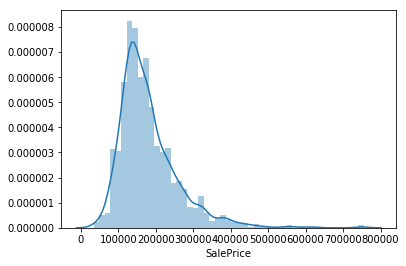

In [6]:
#histogram
sns.distplot(df_train['SalePrice'])
#postive skewness, peakedness noted 왼쪽으로 치우친 비대칭도, 솟구쳐있는 모양 확인 가능

In [7]:
#Skewness = 비대칭도
print("Skewness: %f" % df_train['SalePrice'].skew())
#Kurtosis = 도수분표의 뾰족한 정도(첨도)
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### SalePrice relationship with numerical variables

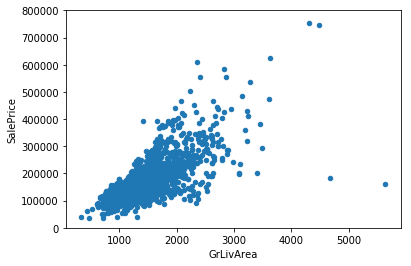

In [8]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
#result : linear relationship

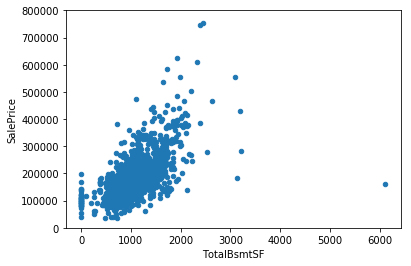

In [9]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
#result : strong linear(exponential?) relationship & lots of 0 credits

### SalePrice relationship with categorical variables

(-0.5, 9.5, 0, 800000)

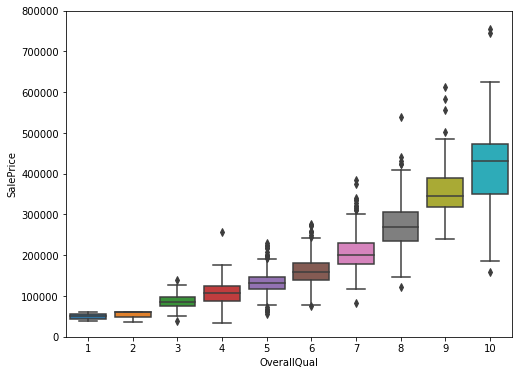

In [10]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
#when sales price increases, overall quality increases as well

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

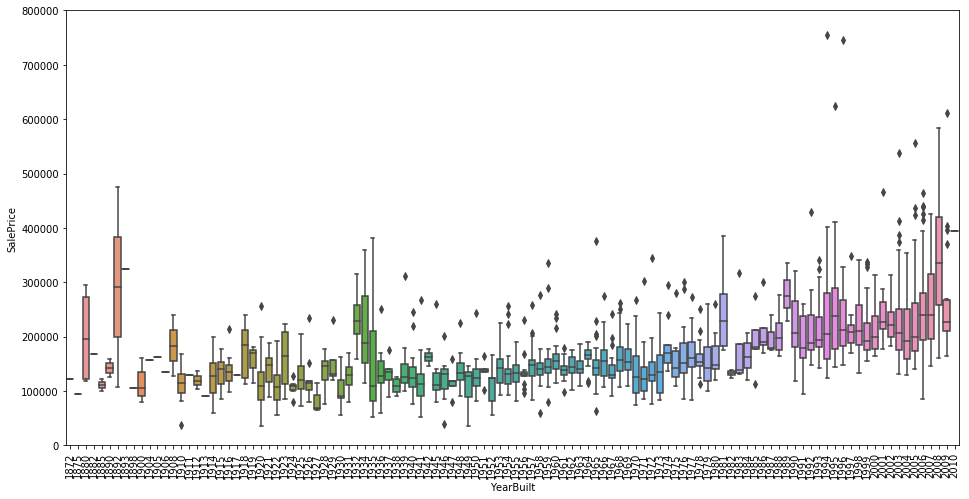

In [11]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
#'SalePrice' is more prone to spend more money in new stuff than in old relics

## Let's do a more objective analysis
1. Correlation matrix

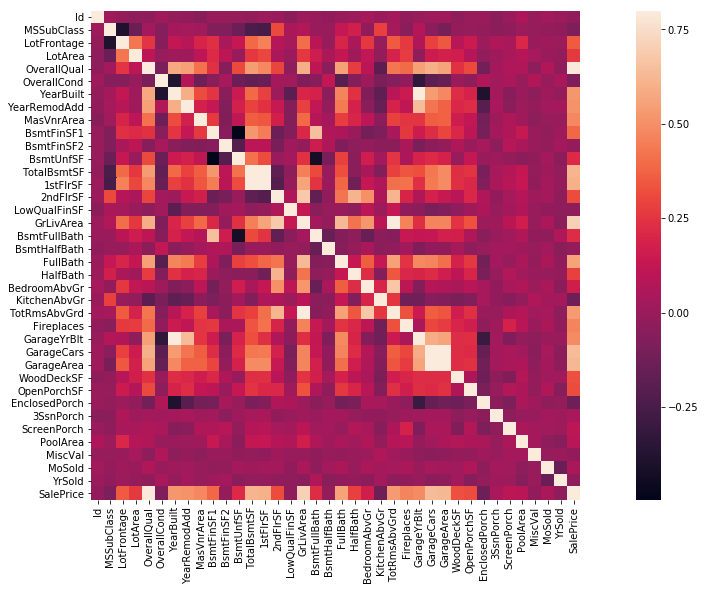

In [12]:
#heatmap
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corrmat, vmax=.8, square=True)
#'GrLivArea', 'TotalBsmtSF', and 'OverallQual' show strong correlation with 'SalePrice'

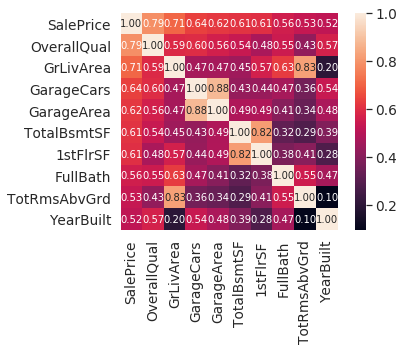

In [13]:
#saleprice correlation matrix
k = 10
#top 10 variables that have strong correlation with 'saleprice'
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#GarageCars==GarageArea/1stFlrSF==TotalBsmtSF/TotRmsAbvGrd==GrLivArea

Among 10 strong variables, only these remain after removing all the variables that contain the same info.
> 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'


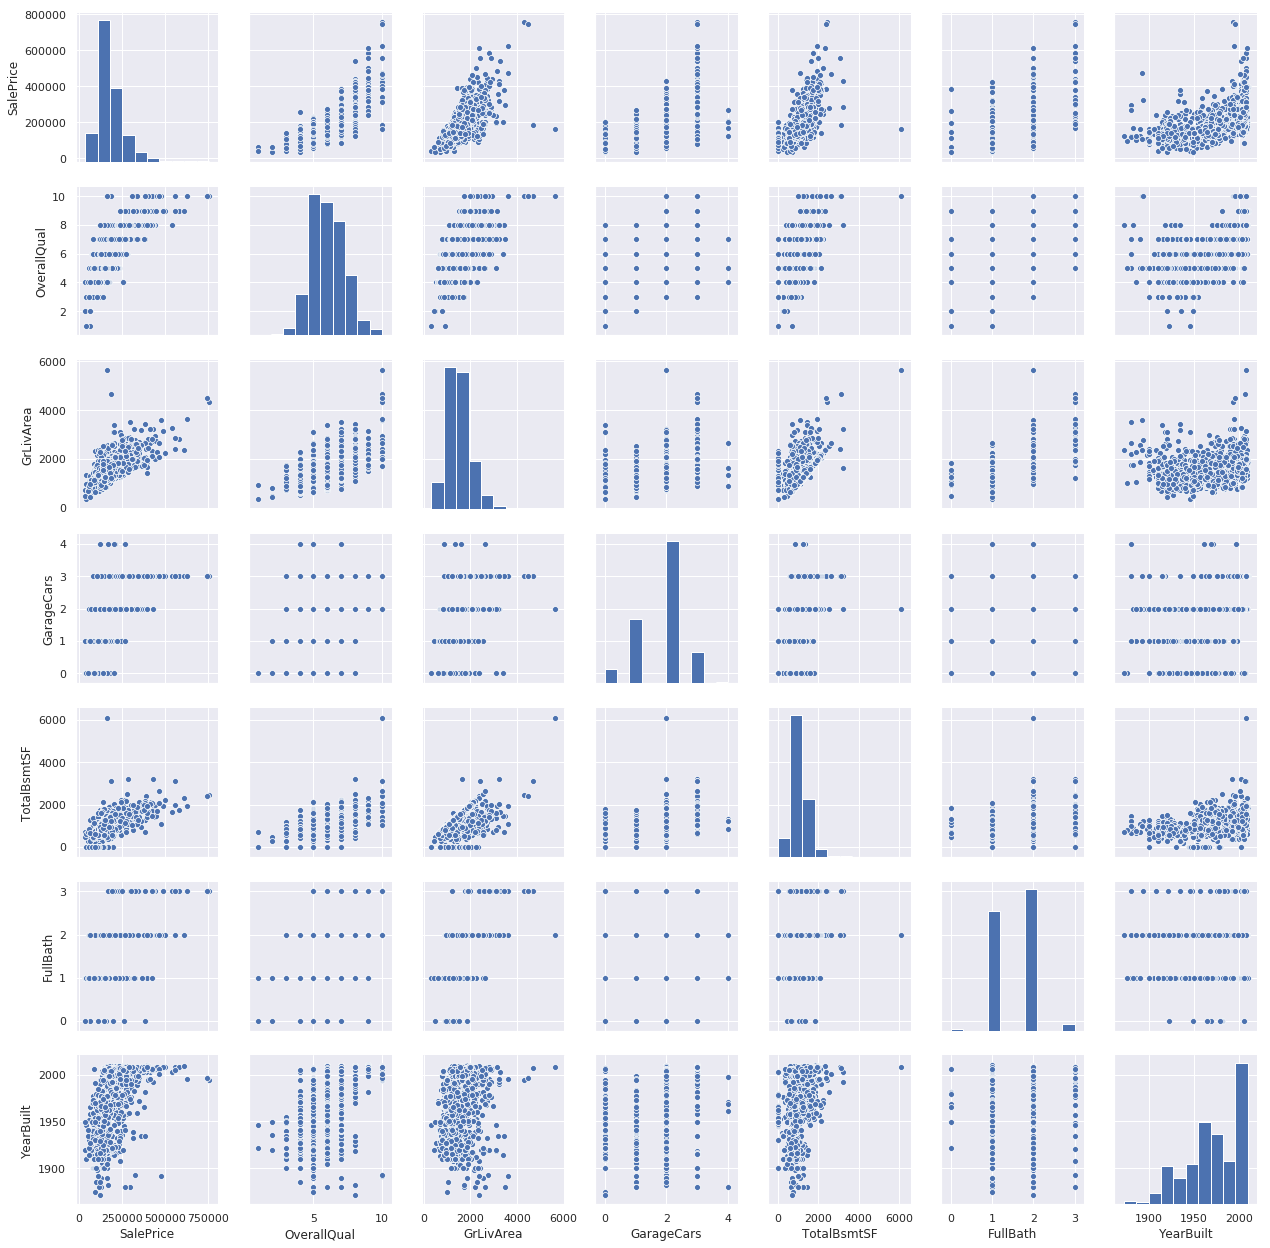

In [14]:
#scatterplot btw SalePrice&other variables
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

## Handling missing data
- helps you reduce the sample size 

In [15]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### Examination 

- PoolQC, MiscFeature, Alley, Fence, FireplaceQu = strong candidates for [outlier](https://www.google.co.kr/amp/s/conversionxl.com/blog/outliers/amp/)
- GarageX, BsmtX = insignificant and can be replaced by 'GarageCars'/'TotalBsmtSF'
- MasVnrArea, MasVnrType = can be replaced by 'YearBuilt' and 'OverallQual'
- Electrical = only 1 observation

Therefore, instead of filling in missing data, we should delete everything. 

In [16]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

## implementing standard deviation in 'SalePrice'
- in order to find outliers

In [17]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)
#low range values are not too far from 0, but high range values are far from 0

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


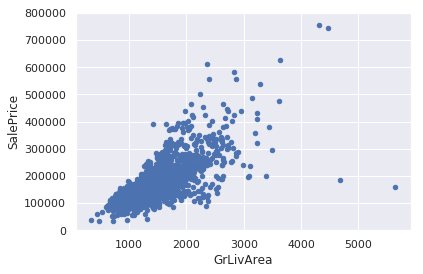

In [18]:
#scatterplot
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

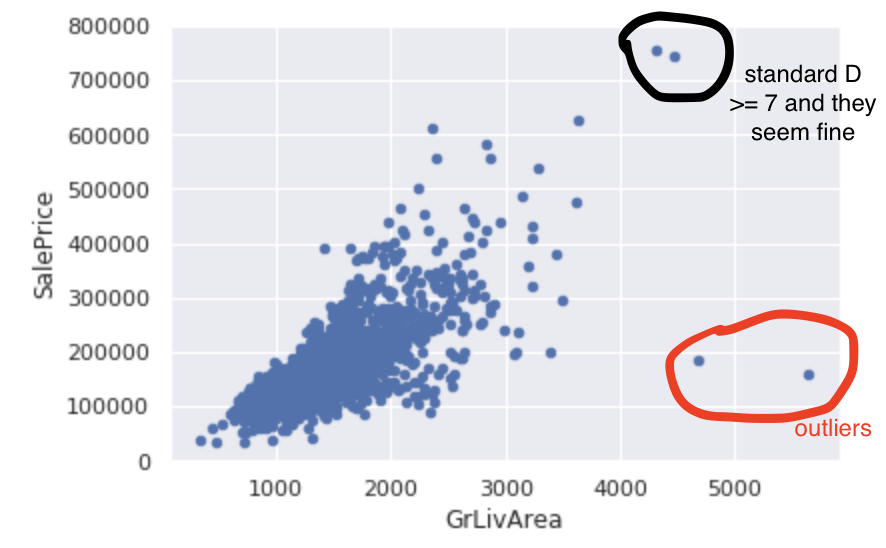![](http://)

In [19]:
#deleting outliers
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

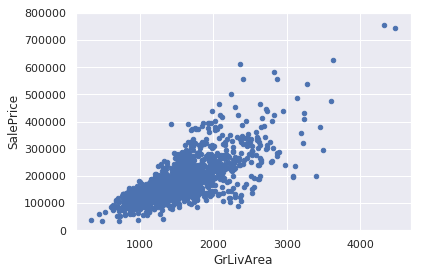

In [20]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

## Checking normality
- to make sure data looks like normal distribution(정규분포)

### 1. SalePrice

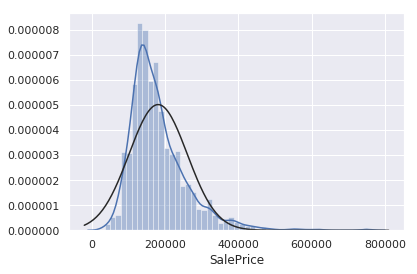

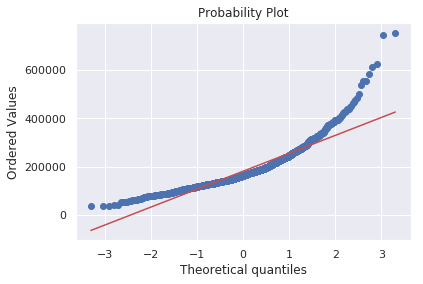

In [21]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)
#since positive skewness is observed, simple data transformation can help

In [22]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

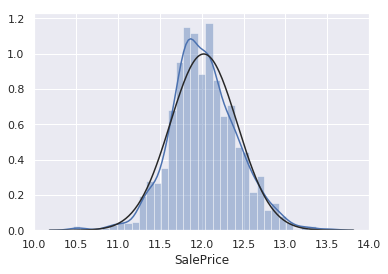

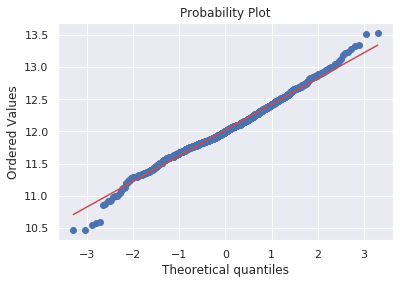

In [23]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

### 2. GrLivArea

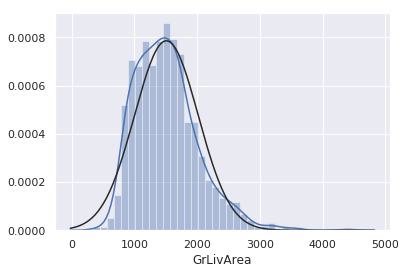

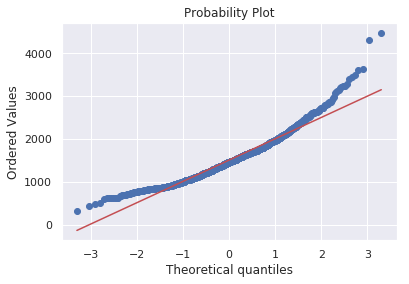

In [24]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)
#skewness observed

In [25]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

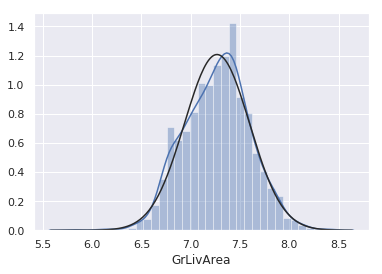

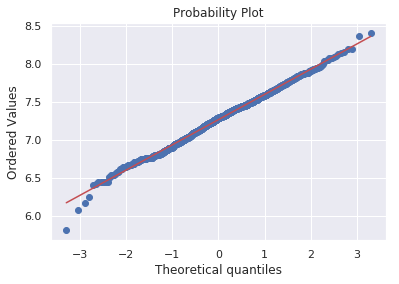

In [26]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

### 3. TotalBsmtSF

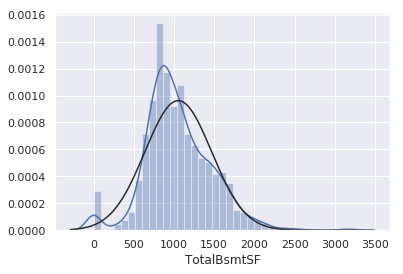

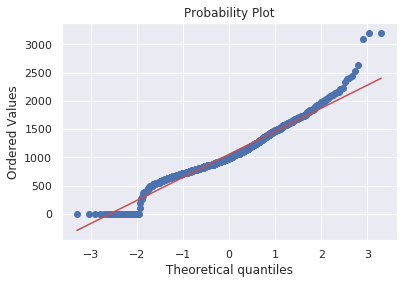

In [27]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)
#skewness is observed and a significant number of observations with value 0

In [28]:
#create column for new variable (one is enough because it's a binary categorical feature) 지하 있냐없냐
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [29]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

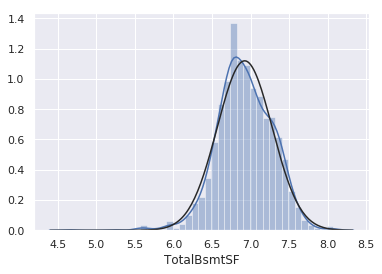

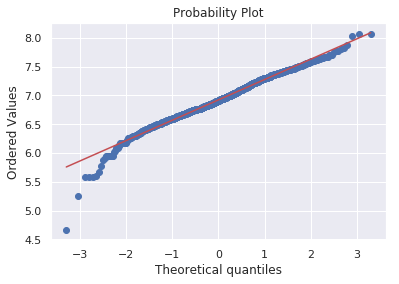

In [30]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## Checking homoscedasticity 
-[등분산성](https://www.google.co.kr/amp/ko.amp.wordow.com/english/dictionary/homoscedasticity)

ensuring normality solves homoscedasticity problem!

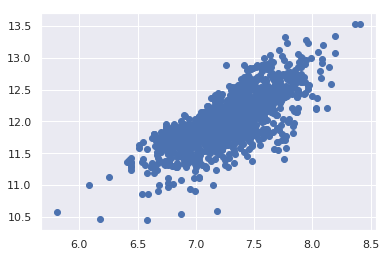

In [31]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

## Creating dummy variables

In [32]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)